In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
df = pd.read_csv(r'D:\TreeClassification_miniproject\tree_dataset.csv')

In [49]:
le = LabelEncoder()
df['outcome'] = le.fit_transform(df['outcome'])
Outcome_name = le.classes_ 

In [50]:
x = df.drop(columns=['sample No', 'outcome'])
y = df['outcome']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=69)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=69)  

In [52]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_val = sc.transform(x_val)

In [53]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_val = keras.utils.to_categorical(y_val, num_classes=3)

In [54]:
model = Sequential([
    Dense(units=32, activation='relu', input_shape=(x_train.shape[-1],)),
    Dense(units=32, activation='relu'),
    Dropout(0.5),
    Dense(units=3, activation='softmax')
])

In [55]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_val, y_val), verbose=2)

Epoch 1/20
9/9 - 1s - loss: 1.0155 - accuracy: 0.4643 - val_loss: 0.9961 - val_accuracy: 0.6190 - 1s/epoch - 129ms/step
Epoch 2/20
9/9 - 0s - loss: 0.9606 - accuracy: 0.4762 - val_loss: 0.8942 - val_accuracy: 0.7143 - 73ms/epoch - 8ms/step
Epoch 3/20
9/9 - 0s - loss: 0.9546 - accuracy: 0.5238 - val_loss: 0.8136 - val_accuracy: 0.6667 - 70ms/epoch - 8ms/step
Epoch 4/20
9/9 - 0s - loss: 0.9068 - accuracy: 0.5833 - val_loss: 0.7554 - val_accuracy: 0.7619 - 71ms/epoch - 8ms/step
Epoch 5/20
9/9 - 0s - loss: 0.8303 - accuracy: 0.6667 - val_loss: 0.7028 - val_accuracy: 0.8095 - 90ms/epoch - 10ms/step
Epoch 6/20
9/9 - 0s - loss: 0.7871 - accuracy: 0.6905 - val_loss: 0.6568 - val_accuracy: 0.8095 - 84ms/epoch - 9ms/step
Epoch 7/20
9/9 - 0s - loss: 0.7483 - accuracy: 0.7262 - val_loss: 0.6187 - val_accuracy: 0.8095 - 82ms/epoch - 9ms/step
Epoch 8/20
9/9 - 0s - loss: 0.6493 - accuracy: 0.7857 - val_loss: 0.5793 - val_accuracy: 0.8095 - 61ms/epoch - 7ms/step
Epoch 9/20
9/9 - 0s - loss: 0.6425 - ac

In [57]:
print("Enter the feature values:")
user_input = [float(input(f"{col}: ")) for col in x.columns]

Enter the feature values:
Base Angle (in degrees): 71
Apex Angle (in degrees): 50
Angle of Vain (in dgrees): 59
Lenth (Cm): 14.6
Width (Cm): 5.7


In [58]:
input_data = pd.DataFrame([user_input], columns=x.columns)

In [59]:
input_data_scaled = sc.transform(input_data)

In [60]:
user_prediction = model.predict(input_data_scaled)
user_prediction = np.argmax(user_prediction, axis=-1)
predicted_class = Outcome_name[user_prediction[0]]
print(f"Predicted Class: {predicted_class}")
print("1-Ixora Coccinea (Red) 2-Chinese Ixora Leaves 3-Jungle Jeranium Leaves")

1/1 [==============================] - 0s 110ms/step
Predicted Class: 1
1-Ixora Coccinea (Red) 2-Chinese Ixora Leaves 3-Jungle Jeranium Leaves


In [61]:
prediction = model.predict(x_test)
prediction = np.argmax(prediction, axis=-1)

2/2 [==============================] - 0s 3ms/step


In [62]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7777777777777778


In [63]:
cm = confusion_matrix(y_test, prediction)

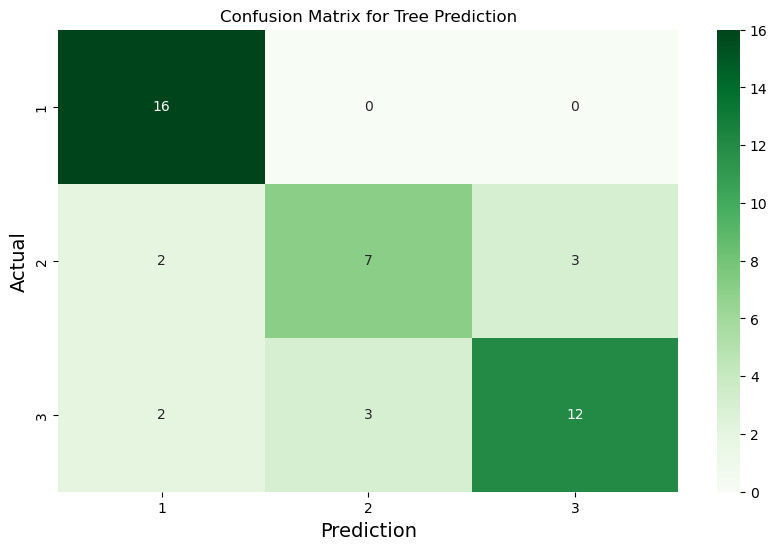

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Outcome_name, yticklabels=Outcome_name)
ax.set_title('Confusion Matrix for Tree Prediction')
ax.set_xlabel('Prediction', fontsize=14)
ax.set_ylabel('Actual', fontsize=14)
plt.show()

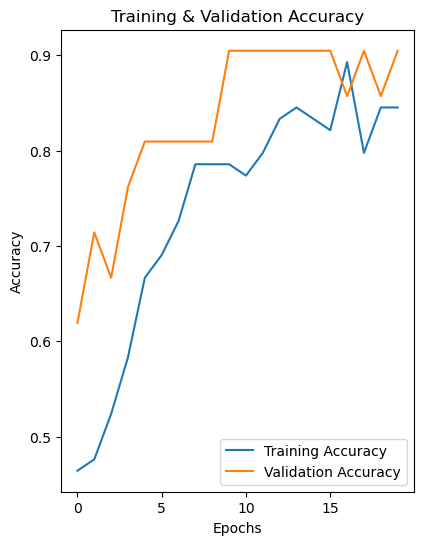

In [65]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

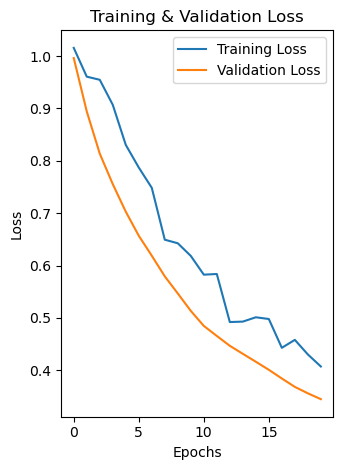

In [66]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()